<a href="https://colab.research.google.com/github/wjunior15/iris_dataset/blob/main/Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Classificação de Flores usando Python
link dataset: [Iris Data Set](https://archive.ics.uci.edu/ml/datasets/Iris)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
dados.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
dados['variety'].value_counts()

Setosa        50
Virginica     50
Versicolor    50
Name: variety, dtype: int64

In [5]:
dados_setosa = dados.query("variety == 'Setosa'")
dados_virginica = dados.query("variety == 'Virginica'")
dados_versicolor = dados.query("variety == 'Versicolor'")

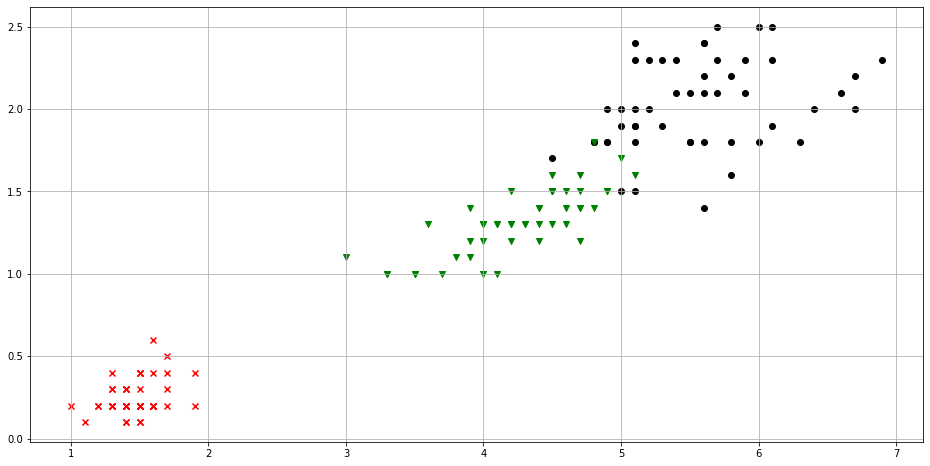

In [15]:
plt.figure(figsize = (16, 8))
plt.scatter(dados_setosa['petal.length'],dados_setosa['petal.width'],c = 'red', marker = 'x')
plt.scatter(dados_virginica['petal.length'],dados_virginica['petal.width'],c = 'black', marker = 'o')
plt.scatter(dados_versicolor['petal.length'],dados_versicolor['petal.width'],c = 'green', marker = 'v')
plt.grid()
plt.show()

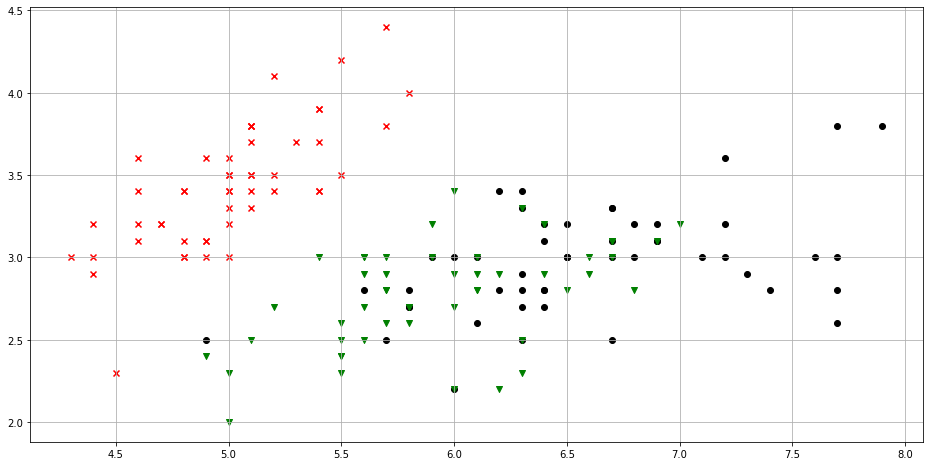

In [16]:
plt.figure(figsize = (16, 8))
plt.scatter(dados_setosa['sepal.length'],dados_setosa['sepal.width'],c = 'red', marker = 'x')
plt.scatter(dados_virginica['sepal.length'],dados_virginica['sepal.width'],c = 'black', marker = 'o')
plt.scatter(dados_versicolor['sepal.length'],dados_versicolor['sepal.width'],c = 'green', marker = 'v')
plt.grid()
plt.show()

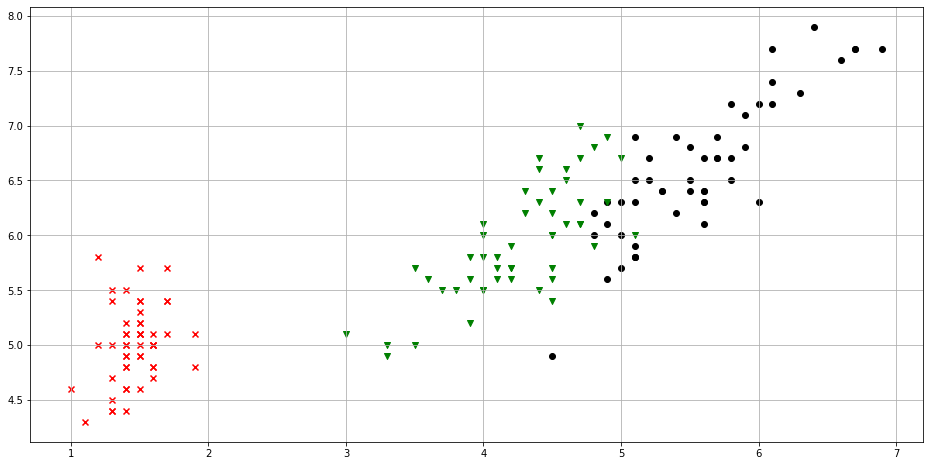

In [17]:
plt.figure(figsize = (16, 8))
plt.scatter(dados_setosa['petal.length'],dados_setosa['sepal.length'],c = 'red', marker = 'x')
plt.scatter(dados_virginica['petal.length'],dados_virginica['sepal.length'],c = 'black', marker = 'o')
plt.scatter(dados_versicolor['petal.length'],dados_versicolor['sepal.length'],c = 'green', marker = 'v')
plt.grid()
plt.show()

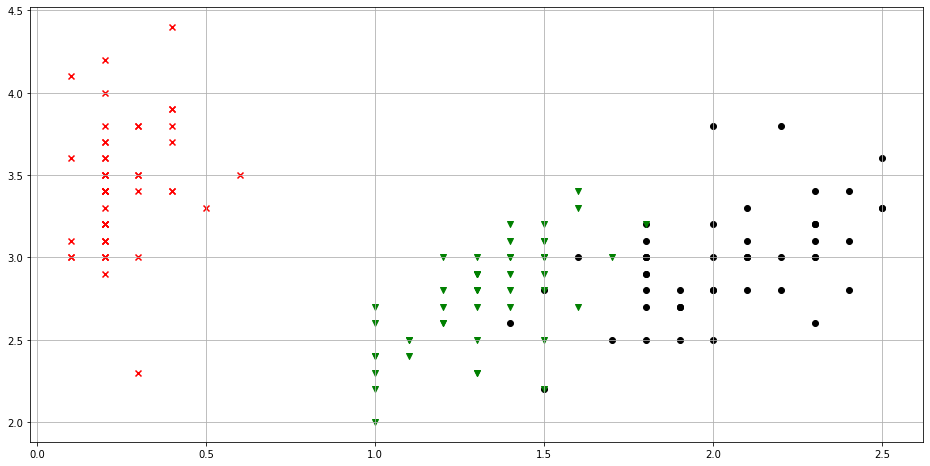

In [18]:
plt.figure(figsize = (16, 8))
plt.scatter(dados_setosa['petal.width'],dados_setosa['sepal.width'],c = 'red', marker = 'x')
plt.scatter(dados_virginica['petal.width'],dados_virginica['sepal.width'],c = 'black', marker = 'o')
plt.scatter(dados_versicolor['petal.width'],dados_versicolor['sepal.width'],c = 'green', marker = 'v')
plt.grid()
plt.show()

#Análise usando modelo de ML

##Primeiro iremos usar apenas os dados de petal.width e petal.length

In [19]:
dados_modelo_1 = dados.iloc[:, [2, 3, 4]]
dados_modelo_1.head()

,petal.length,petal.width,variety
0,1.4,0.2,Setosa
1,1.4,0.2,Setosa
2,1.3,0.2,Setosa
3,1.5,0.2,Setosa
4,1.4,0.2,Setosa


In [20]:
x_1 = dados_modelo_1.iloc[:, :-1]
y_1 = dados_modelo_1.iloc[:, 2]

from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x_1, y_1, test_size = 0.20)

###O método fit() calcula a média e o desvio padrão da distribuição para fazer a padronização dos dados.
###E método transform() aplica os cálculos para fazer a transformação nos dados.


In [21]:
## Padronização dos dados
##Para deixar todos na mesma escala

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_treino)

x_treino_scaler = scaler.transform(x_treino)
x_teste_scaler = scaler.transform(x_teste)

n_neighbors = 5 -> n_neighbors é o parametro para a classe, um valor para K

Pode ser ajustado de acordo com o programa já que não existe um valor ideal, mas é recomendavél iniciá-lo em 5


In [22]:
##Treino e previsões do algoritmo

from sklearn.neighbors import KNeighborsClassifier

modelo_1 = KNeighborsClassifier(n_neighbors= 5)
modelo_1.fit(x_treino, y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [23]:
modelo_1_scaler = KNeighborsClassifier(n_neighbors = 5)
modelo_1_scaler.fit(x_treino_scaler, y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
##Fazendo as predições usando .predict
y_previsoes_1 = modelo_1.predict(x_teste)

In [25]:
y_previsoes_1_scaler = modelo_1_scaler.predict(x_teste_scaler)

Para avaliar um algoritmo, a matriz de confusão, a precisão, o recall e a pontuação f1 são as métricas mais utilizadas.

###Calculo F1:
F1 = 2 * (precision * recall) / (precision + recall)

In [27]:
##Avaliação do Algoritmo

from sklearn.metrics import accuracy_score, f1_score

print(accuracy_score(y_teste, y_previsoes_1))
print(accuracy_score(y_teste, y_previsoes_1_scaler))

1.0
1.0


##Usando banco de dados completo para treinar modelo

In [29]:
##Divisão do dataframe entre rótulos e atributos
##usando .iloc do pandas

x = dados.iloc[:, :-1].values
y = dados.iloc[:, 4].values

In [30]:
##Para dividir os conjuntos entre teste e treino importamos
#from sklearn.model_selection import train_test_split

##Usaremos 80% dos dados para treino e 20% para teste

x_treino_2, x_teste_2, y_treino_2, y_teste_2 = train_test_split(x, y, test_size = 0.20)

In [33]:
scaler_2 = StandardScaler()
scaler_2.fit(x_treino_2)

x_treino_scaler_2 = scaler_2.transform(x_treino_2)
x_teste_scaler_2 = scaler_2.transform(x_teste_2)

In [34]:
modelo_2 = KNeighborsClassifier(n_neighbors= 5)
modelo_2.fit(x_treino_2, y_treino_2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [35]:
y_predict_2 = modelo_2.predict(x_teste_2)
print(accuracy_score(y_teste_2, y_predict_2))


1.0
